# <center> PH549 Coding Project, Autumn 2021 </center>
*<center>H R Sai Sumedh, 180070024*</center>

This code reproduces the simulation results in the following paper:

*Interactions between zebrafish pigment cells responsible for the generation of Turing patterns*

*Akiko Nakamasu, Go Takahashi, Akio Kanbe, Shigeru Kondo*

*Proceedings of the National Academy of Sciences May 2009, pnas.0808622106; DOI: 10.1073/pnas.0808622106*

# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math, time
from functions import *

In [2]:
N = 128 #size of square field
dx = 1
dy = dx

In [3]:
dt= 1
T = 5000
t = np.linspace(0, T, int(T/dt)+1)
tlen = len(t)

In [4]:
Del2x = (-2*np.diag(np.ones((N, )), 0) + np.diag(np.ones((N-1, )), 1) + np.diag(np.ones((N-1, )), -1) )/(dx**2)
Del2x[0,:]=0
Del2x[-1,:] = 0

In [5]:
boundary_mask = np.zeros((N, N))
boundary_mask[1:-1, 1:-1] = 1 #no diffusion boundary conditions

**Initial Conditions**

In [36]:
u = np.zeros((N, N, tlen))
v = np.zeros((N, N, tlen))
w = np.zeros((N, N, tlen))

In [37]:
mid = N//2
v[mid-3:mid+3, 1:1+6] = 0.01
v[mid-3:mid+3, -7:-1] = 0.01
gap = 15
for i in range(1, 8):
    v[mid-3:mid+3,1+ gap*i:1+ gap*i +6,0] = 0.01


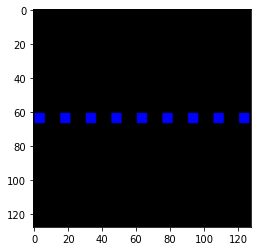

In [38]:
loc = 0
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1)), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))

**Constants**

In [39]:
params_u = [-0.04, -0.055, 0.37, 0.5, 0.02, 0.02, boundary_mask, Del2x] # [c1, c2, c3, U, cu, Du, boundary_mask, Del2x]
params_v = [-0.05, 0, 0.25, 0.5, 0.025, 0.02, boundary_mask, Del2x] #[c4, c5, c6, V, cv, Dv, boundary_mask, Del2x]
params_w = [0.016, -0.03, 0.24, 0.5, 0.06, 0.2, boundary_mask, Del2x] # [c7, c8, c9, W, cw, Dw, boundary_mask, Del2x]

**Time Evolution**

In [40]:
tic = time.time()
for ti in range(tlen-1):
    state = [u[:,:,ti], v[:,:,ti], w[:,:,ti]]
    u[:,:,ti+1] = u[:,:,ti] + dt*dudt(*state, *params_u)
    v[:,:,ti+1] = v[:,:,ti] + dt*dvdt(*state, *params_v)
    w[:,:,ti+1] = w[:,:,ti] + dt*dwdt(*state, *params_w)
print(f"Time for {tlen} iterations={time.time()-tic}s")

Time for 5001 iterations=38.42154836654663s


In [41]:
u_ss = u[:,:,-1]
v_ss = v[:,:,-1]
w_ss = w[:,:,-1]

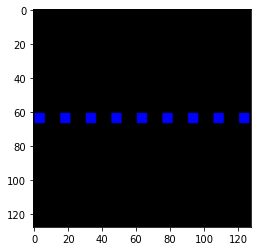

In [46]:
loc = 0
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1)), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))

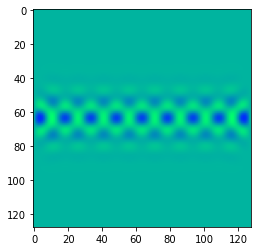

In [44]:
loc = 1500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))


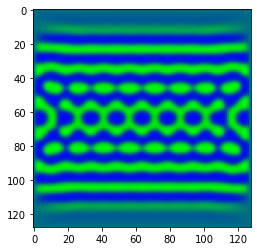

In [45]:
loc = 3000
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))


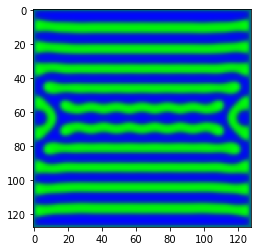

In [43]:
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,-1].reshape((N, N, 1))/np.amax(u[:,:,-1]), v[:,:,-1].reshape((N, N, 1))/np.amax(v[:,:,-1])), axis=2))

# Figure C

Time for 5001 iterations=39.21506857872009s


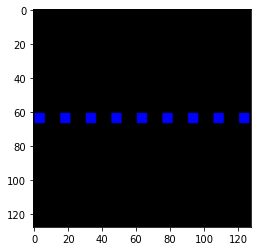

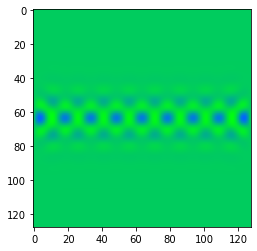

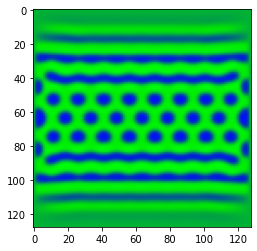

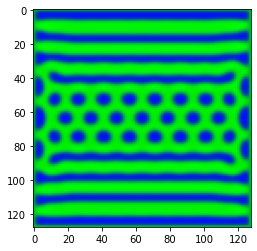

In [47]:
u = np.zeros((N, N, tlen))
v = np.zeros((N, N, tlen))
w = np.zeros((N, N, tlen))

# constraints
params_u = [-0.04, -0.055, 0.37, 0.5, 0.02, 0.02, boundary_mask, Del2x] # [c1, c2, c3, U, cu, Du, boundary_mask, Del2x]
params_v = [-0.05, 0, 0.25, 0.5, 0.025, 0.02, boundary_mask, Del2x] #[c4, c5, c6, V, cv, Dv, boundary_mask, Del2x]
params_w = [0.016, -0.03, 0.24, 0.5, 0.06, 0.2, boundary_mask, Del2x] # [c7, c8, c9, W, cw, Dw, boundary_mask, Del2x]
params_u[2] = 0.385

# initial conditions
mid = N//2
v[mid-3:mid+3, 1:1+6] = 0.01
v[mid-3:mid+3, -7:-1] = 0.01
gap = 15
for i in range(1, 8):
    v[mid-3:mid+3,1+ gap*i:1+ gap*i +6,0] = 0.01

tic = time.time()
for ti in range(tlen-1):
    state = [u[:,:,ti], v[:,:,ti], w[:,:,ti]]
    u[:,:,ti+1] = u[:,:,ti] + dt*dudt(*state, *params_u)
    v[:,:,ti+1] = v[:,:,ti] + dt*dvdt(*state, *params_v)
    w[:,:,ti+1] = w[:,:,ti] + dt*dwdt(*state, *params_w)
print(f"Time for {tlen} iterations={time.time()-tic}s")

loc = 0
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1)), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 1500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 3000
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 4500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()


# Figure D- could not be reproduced- numerical issues

D:\sem7\ph549_physics_of_biosys\coding_project\functions.py:38: RuntimeWarning: overflow encountered in add
  Lap_c = d2x_c+d2y_c
D:\sem7\ph549_physics_of_biosys\coding_project\functions.py:17: RuntimeWarning: invalid value encountered in multiply
  val = c4*u+c5*w+c6


Time for 5001 iterations=37.42913508415222s


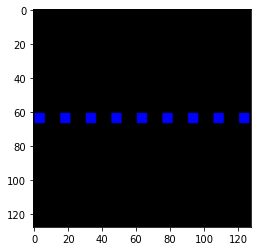

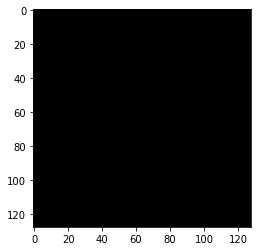

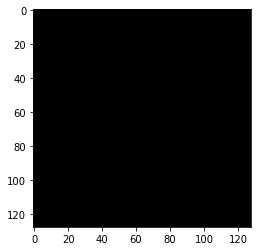

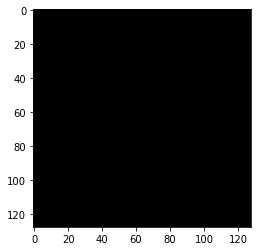

In [49]:
u = np.zeros((N, N, tlen))
v = np.zeros((N, N, tlen))
w = np.zeros((N, N, tlen))

# constraints
params_u = [-0.04, -0.055, 0.37, 0.5, 0.02, 0.02, boundary_mask, Del2x] # [c1, c2, c3, U, cu, Du, boundary_mask, Del2x]
params_v = [-0.05, 0, 0.25, 0.5, 0.025, 0.02, boundary_mask, Del2x] #[c4, c5, c6, V, cv, Dv, boundary_mask, Del2x]
params_w = [0.016, -0.03, 0.24, 0.5, 0.06, 0.2, boundary_mask, Del2x] # [c7, c8, c9, W, cw, Dw, boundary_mask, Del2x]
params_u[5] = 0.04
params_v[5] = 0.04
params_w[5] = 0.4

# initial conditions
mid = N//2
v[mid-3:mid+3, 1:1+6] = 0.01
v[mid-3:mid+3, -7:-1] = 0.01
gap = 15
for i in range(1, 8):
    v[mid-3:mid+3,1+ gap*i:1+ gap*i +6,0] = 0.01

tic = time.time()
for ti in range(tlen-1):
    state = [u[:,:,ti], v[:,:,ti], w[:,:,ti]]
    u[:,:,ti+1] = u[:,:,ti] + dt*dudt(*state, *params_u)
    v[:,:,ti+1] = v[:,:,ti] + dt*dvdt(*state, *params_v)
    w[:,:,ti+1] = w[:,:,ti] + dt*dwdt(*state, *params_w)
print(f"Time for {tlen} iterations={time.time()-tic}s")

loc = 0
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1)), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 1500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 3000
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 4500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()

# Figure E

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Time for 5001 iterations=39.92993521690369s


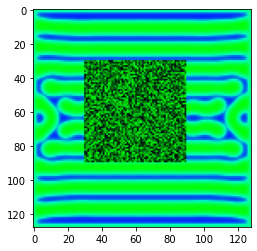

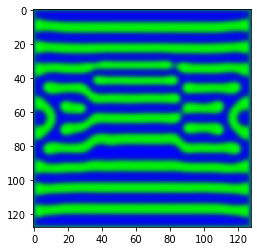

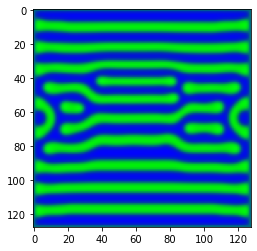

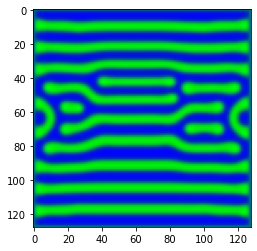

In [51]:
u = np.zeros((N, N, tlen))
v = np.zeros((N, N, tlen))
w = np.zeros((N, N, tlen))
np.random.seed(0)
# constraints
params_u = [-0.04, -0.055, 0.37, 0.5, 0.02, 0.02, boundary_mask, Del2x] # [c1, c2, c3, U, cu, Du, boundary_mask, Del2x]
params_v = [-0.05, 0, 0.25, 0.5, 0.025, 0.02, boundary_mask, Del2x] #[c4, c5, c6, V, cv, Dv, boundary_mask, Del2x]
params_w = [0.016, -0.03, 0.24, 0.5, 0.06, 0.2, boundary_mask, Del2x] # [c7, c8, c9, W, cw, Dw, boundary_mask, Del2x]

#initial conditions
u[:,:,0] = np.copy(u_ss)
v[:,:,0] = np.copy(v_ss)
w[:,:,0] = np.copy(w_ss)

u[30:90, 30:90, 0] = np.random.uniform(0, 1, (60, 60))
v[30:90, 30:90, 0] = np.random.uniform(0, 1, (60, 60))

tic = time.time()
for ti in range(tlen-1):
    state = [u[:,:,ti], v[:,:,ti], w[:,:,ti]]
    u[:,:,ti+1] = u[:,:,ti] + dt*dudt(*state, *params_u)
    v[:,:,ti+1] = v[:,:,ti] + dt*dvdt(*state, *params_v)
    w[:,:,ti+1] = w[:,:,ti] + dt*dwdt(*state, *params_w)
print(f"Time for {tlen} iterations={time.time()-tic}s")

loc = 0
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1)), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 1500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 3000
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()
loc = 4500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()

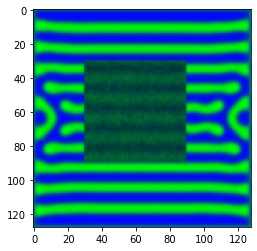

In [55]:
loc = 10
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()

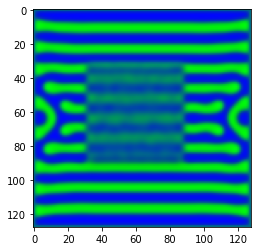

In [53]:
loc = 200
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()

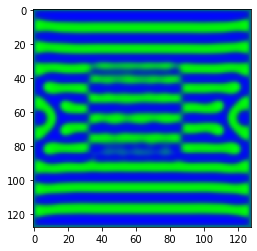

In [52]:
loc = 500
plt.imshow(np.concatenate((np.zeros((N, N, 1)), u[:,:,loc].reshape((N, N, 1))/np.amax(u[:,:,loc]), v[:,:,loc].reshape((N, N, 1))/np.amax(v[:,:,loc])), axis=2))
plt.show()